Progetto di Banfi Michele 869294

## Sommario dei dati utilizzati

Financials:
1. **JPM** JPMorgan Chase & Co. 
2. **BAC** Bank Of America Corp

Healtcare:
1. **JNJ** Johnson & Johnson
2. **PFE** Pfizer Inc.

Energy
1. **CVX** Chevron Corporation
2. **XOM** Exxon Mobil Corporation

Importiamo le librerie necessarie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Scarichiamo i dati dei titoli selezionati, compresi tra le seguenti date: 30.11.2012 – 30.11.2022.

In [3]:
start = "2012-11-30"
end = "2022-11-30"

#Financials
JPM = yf.download("JPM", start, end)
BAC = yf.download("BAC", start, end)

#Healtcare
JNJ = yf.download("JNJ", start, end)
PFE = yf.download("PFE", start, end)

#Energy
CVX = yf.download("CVX", start, end)
XOM = yf.download("XOM", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Per avere una priva vista dei dati utilizziamo il metodo `.describe()` che ci permette di avere una breve descrizione statistica

In [4]:
JPM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,93.851136,94.731037,92.970560,93.851482,83.820031,1.577044e+07
std,33.907864,34.250336,33.558312,33.885248,35.876948,6.844212e+06
min,40.689999,40.919998,40.200001,40.570000,30.739651,3.220500e+06
25%,60.970001,61.480000,60.450001,60.959999,49.403744,1.125030e+07
50%,93.820000,95.150002,92.650002,93.760002,84.171501,1.401420e+07
75%,115.279999,116.199997,114.320000,115.180000,105.218620,1.846510e+07
max,172.710007,172.960007,170.539993,171.779999,166.523987,6.088080e+07


In [5]:
BAC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,24.777978,25.041093,24.508677,24.774009,22.784345,7.728412e+07
std,9.483783,9.587238,9.374983,9.475852,9.737711,4.224534e+07
min,9.780000,9.870000,9.760000,9.800000,8.318864,1.380540e+07
25%,16.040001,16.190001,15.870000,16.040001,13.812621,4.917810e+07
50%,24.260000,24.580000,24.000000,24.240000,22.186407,6.618820e+07
75%,30.879999,31.150000,30.559999,30.879999,28.185310,9.298740e+07
max,49.910000,50.110001,49.029999,49.380001,48.256390,4.634910e+08


In [6]:
JNJ.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,127.199448,128.085554,126.287708,127.221148,113.268050,7.576588e+06
std,27.854863,28.124224,27.590340,27.853445,33.036383,3.150075e+06
min,69.239998,69.919998,69.180000,69.480003,52.922852,2.114900e+06
25%,102.120003,102.680000,101.500000,102.169998,82.829941,5.646300e+06
50%,128.860001,130.149994,127.650002,128.960007,114.352196,6.915300e+06
75%,146.990005,148.339996,145.869995,146.979996,137.433533,8.689400e+06
max,185.100006,186.690002,184.179993,186.009995,182.411407,5.814020e+07


In [7]:
PFE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,35.123943,35.442971,34.804061,35.127288,29.933336,2.899347e+07
std,6.936173,7.070667,6.810944,6.950114,8.943611,1.759352e+07
min,23.406073,23.795067,23.368120,23.614801,16.509907,5.187683e+06
25%,30.322580,30.588236,30.037951,30.332067,23.436920,1.977340e+07
50%,33.444023,33.709679,33.197342,33.490002,27.983572,2.511134e+07
75%,38.814041,39.180000,38.520000,38.823528,34.467243,3.285803e+07
max,60.599998,61.709999,59.830002,61.250000,59.323395,2.998294e+08


In [8]:
CVX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,113.345848,114.379770,112.277080,113.356412,92.178709,8.122344e+06
std,19.845245,19.974475,19.756069,19.895286,23.646302,4.311982e+06
min,55.259998,58.490002,51.599998,54.220001,47.611782,1.587800e+06
25%,102.379997,103.269997,101.519997,102.320000,78.191048,5.403600e+06
50%,114.370003,115.239998,113.209999,114.180000,85.810188,6.975500e+06
75%,121.870003,122.730003,120.910004,121.910004,100.092178,9.664600e+06
max,187.119995,189.679993,186.179993,188.050003,186.606522,5.723100e+07


In [9]:
XOM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,78.446643,79.117362,77.770274,78.459758,61.119599,1.648936e+07
std,16.317048,16.324204,16.333013,16.357000,12.477856,9.376462e+06
min,31.410000,32.380001,30.110001,31.450001,26.768915,3.851300e+06
25%,71.769997,72.300003,71.040001,71.750000,57.596527,1.019740e+07
50%,82.089996,82.580002,81.500000,82.050003,61.008537,1.355150e+07
75%,88.910004,89.559998,88.339996,88.970001,64.582901,1.962620e+07
max,113.879997,114.660004,113.059998,114.180000,114.180000,8.443940e+07


Uniamo i dati in un unico dataframe cosi da poter studiare al meglio l'andamento storico dei prezzi. Uniamo secondo l'`Adj Close` che é il prezzo di chiusura giornaliero aggiustato con i dividendi

In [10]:
market = pd.concat([JPM['Adj Close'], BAC['Adj Close'], JNJ['Adj Close'], PFE['Adj Close'], CVX['Adj Close'], XOM['Adj Close']], axis=1)
market.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']

In [11]:
market.head()

,JPM,BAC,JNJ,PFE,CVX,XOM
Date,,,,,,
2012-11-30,31.126060,8.369796,53.113270,16.596136,69.891800,57.710136
2012-12-03,30.921513,8.318864,53.052341,16.642567,69.210678,57.363129
2012-12-04,30.739651,8.412237,53.212296,16.695635,68.747765,57.088135
2012-12-05,31.216999,8.888080,53.296082,17.007387,69.547928,57.441711
2012-12-06,31.421564,8.888080,53.357014,16.987488,70.394394,57.618492


Ora possiamo procede con il plot dei dati

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

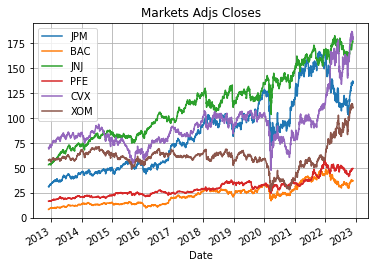

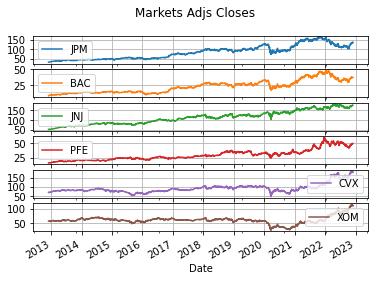

In [12]:
market.plot(grid=True, title="Markets Adjs Closes")
market.plot(grid=True, title="Markets Adjs Closes", subplots=True)

## Statistiche descrittive

#### Rendimenti

Calcolo dei dati annui

In [13]:
JPMy = JPM.groupby(pd.Grouper(freq='Y')).mean()
BACy = BAC.groupby(pd.Grouper(freq='Y')).mean()
JNJy = JNJ.groupby(pd.Grouper(freq='Y')).mean()
PFEy = PFE.groupby(pd.Grouper(freq='Y')).mean()
CVXy = CVX.groupby(pd.Grouper(freq='Y')).mean()
XOMy = XOM.groupby(pd.Grouper(freq='Y')).mean()
marketY = pd.concat([JPMy['Adj Close'], BACy['Adj Close'], JNJy['Adj Close'], PFEy['Adj Close'], CVXy['Adj Close'], XOMy['Adj Close']], axis=1)
marketY.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']

In [14]:
marketY.head(14)

,JPM,BAC,JNJ,PFE,CVX,XOM
Date,,,,,,
2012-12-31,32.441210,9.205317,53.580446,16.786601,71.180371,57.564546
2013-12-31,39.999524,11.445543,66.341844,19.580293,80.816773,60.101685
2014-12-31,46.075223,13.960015,80.240114,21.159968,83.779963,66.384811
2015-12-31,51.920089,14.311630,81.609188,24.348035,69.561330,58.253506
2016-12-31,54.933521,13.513989,95.712283,24.559840,75.651887,62.840552
2017-12-31,78.939794,21.971163,112.254918,26.489143,87.832354,61.816627
2018-12-31,97.054243,26.814231,118.070120,31.600808,98.379411,62.773029
2019-12-31,102.727658,27.267753,123.043482,33.340948,101.807330,60.439994
2020-12-31,99.259952,24.857107,136.680900,32.000936,78.589112,38.625273


Rendimenti composti e cumulati annui

In [15]:
#Rendimento cumulato annuale
rcuJPMy = np.sum(JPMy['Adj Close'] / JPMy['Adj Close'].shift(1))
rcuBACy = np.sum(BACy['Adj Close'] / BACy['Adj Close'].shift(1))
rcuJNJy = np.sum(JNJy['Adj Close'] / JNJy['Adj Close'].shift(1))
rcuPFEy = np.sum(PFEy['Adj Close'] / PFEy['Adj Close'].shift(1))
rcuCVXy = np.sum(CVXy['Adj Close'] / CVXy['Adj Close'].shift(1))
rcuXOMy = np.sum(XOMy['Adj Close'] / XOMy['Adj Close'].shift(1))
#Rendimento composto annuale
rcoJPMy = np.prod(JPMy['Adj Close'] / JPMy['Adj Close'].shift(1))
rcoBACy = np.prod(BACy['Adj Close'] / BACy['Adj Close'].shift(1))
rcoJNJy = np.prod(JNJy['Adj Close'] / JNJy['Adj Close'].shift(1))
rcoPFEy = np.prod(PFEy['Adj Close'] / PFEy['Adj Close'].shift(1))
rcoCVXy = np.prod(CVXy['Adj Close'] / CVXy['Adj Close'].shift(1))
rcoXOMy = np.prod(XOMy['Adj Close'] / XOMy['Adj Close'].shift(1))

Rendimenti semplici e logaritmici

In [22]:
#rendimento semplice
rsJPM = JPM['Adj Close'] / JPM['Adj Close'].shift(1)
rsBAC = BAC['Adj Close'] / BAC['Adj Close'].shift(1)
rsJNJ = JNJ['Adj Close'] / JNJ['Adj Close'].shift(1)
rsPFE = PFE['Adj Close'] / PFE['Adj Close'].shift(1)
rsCVX = CVX['Adj Close'] / CVX['Adj Close'].shift(1)
rsXOM = XOM['Adj Close'] / XOM['Adj Close'].shift(1)
rsJPM.dropna()
rsBAC.dropna()
rsJNJ.dropna()
rsPFE.dropna()
rsCVX.dropna()
rsXOM.dropna()
rsMarket = pd.concat([rsJPM, rsBAC, rsJNJ, rsPFE, rsCVX, rsXOM], axis=1)
rsMarket.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']
#rendimento logaritmico
rlJPM = np.log(JPM['Adj Close'] / JPM['Adj Close'].shift(1))
rlBAC = np.log(BAC['Adj Close'] / BAC['Adj Close'].shift(1))
rlJNJ = np.log(JNJ['Adj Close'] / JNJ['Adj Close'].shift(1))
rlPFE = np.log(PFE['Adj Close'] / PFE['Adj Close'].shift(1))
rlCVX = np.log(CVX['Adj Close'] / CVX['Adj Close'].shift(1))
rlXOM = np.log(XOM['Adj Close'] / XOM['Adj Close'].shift(1))
rlJPM.dropna()
rlBAC.dropna()
rlJNJ.dropna()
rlPFE.dropna()
rlCVX.dropna()
rlXOM.dropna()
rlMarket = pd.concat([rlJPM, rlBAC, rlJNJ, rlPFE, rlCVX, rlXOM], axis=1)
rlMarket.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

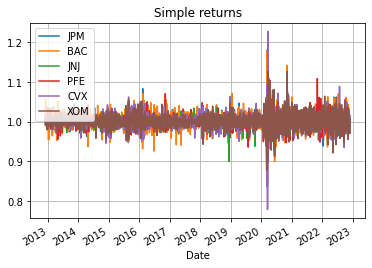

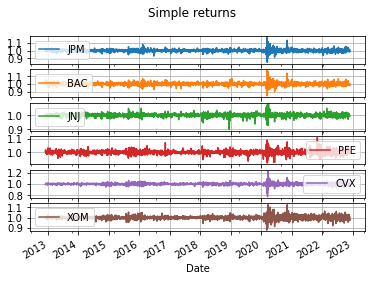

In [23]:
#Plot market Simple returns
rsMarket.plot(grid=True, title="Simple returns")
rsMarket.plot(grid=True, title="Simple returns", subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

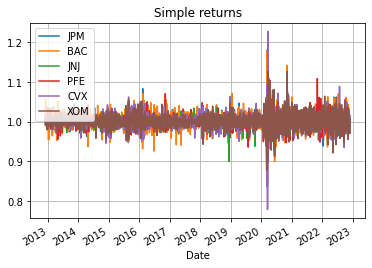

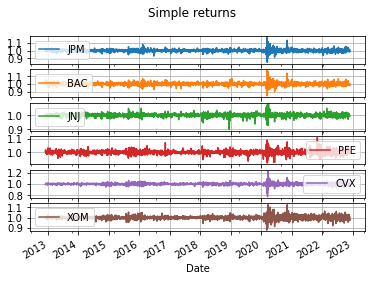

In [24]:
#Plot market Logarithmic returns
rsMarket.plot(grid=True, title="Simple returns")
rsMarket.plot(grid=True, title="Simple returns", subplots=True)

Ora plottiamo i rendimenti con istogrammi per vedere meglio che distribuzione hanno

<AxesSubplot:title={'center':'XOM Simple returns histogram'}, ylabel='Density'>

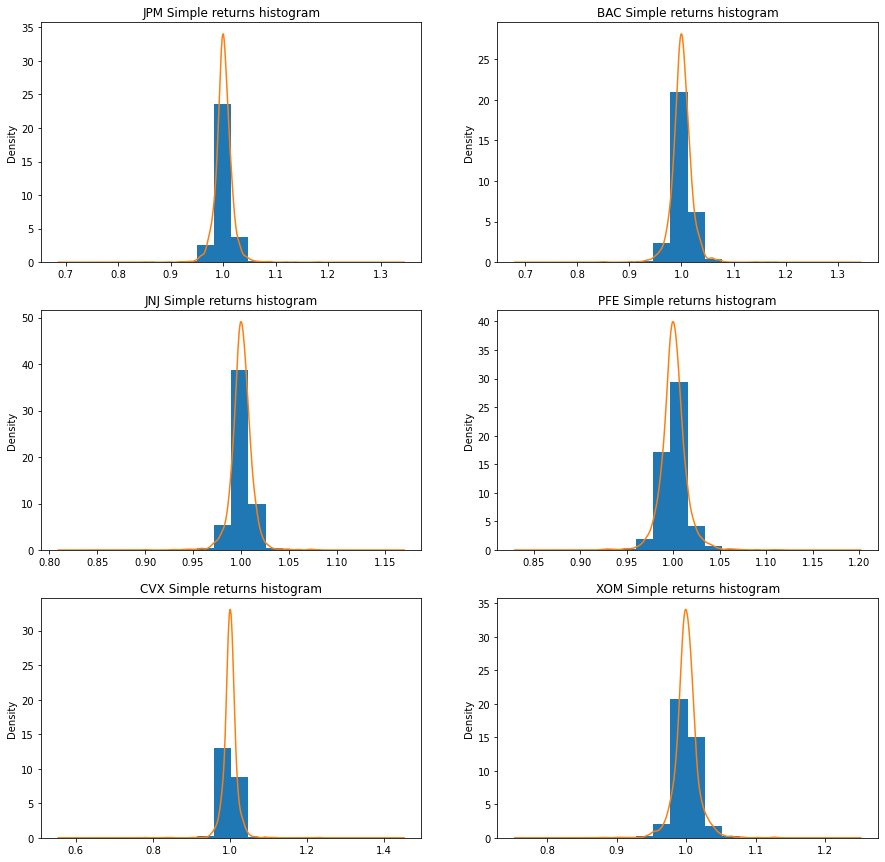

In [33]:
#Rendimenti semplici
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.hist(rsJPM, density=True)
plt.title('JPM Simple returns histogram')
rsJPM.plot.density()
plt.subplot(322)
plt.hist(rsBAC, density=True)
plt.title('BAC Simple returns histogram')
rsBAC.plot.density()
plt.subplot(323)
plt.hist(rsJNJ, density=True)
plt.title('JNJ Simple returns histogram')
rsJNJ.plot.density()
plt.subplot(324)
plt.hist(rsPFE, density=True)
plt.title('PFE Simple returns histogram')
rsPFE.plot.density()
plt.subplot(325)
plt.hist(rsCVX, density=True)
plt.title('CVX Simple returns histogram')
rsCVX.plot.density()
plt.subplot(326)
plt.hist(rsXOM, density=True)
plt.title('XOM Simple returns histogram')
rsXOM.plot.density()

<AxesSubplot:title={'center':'XOM Logarithmic returns histogram'}, ylabel='Density'>

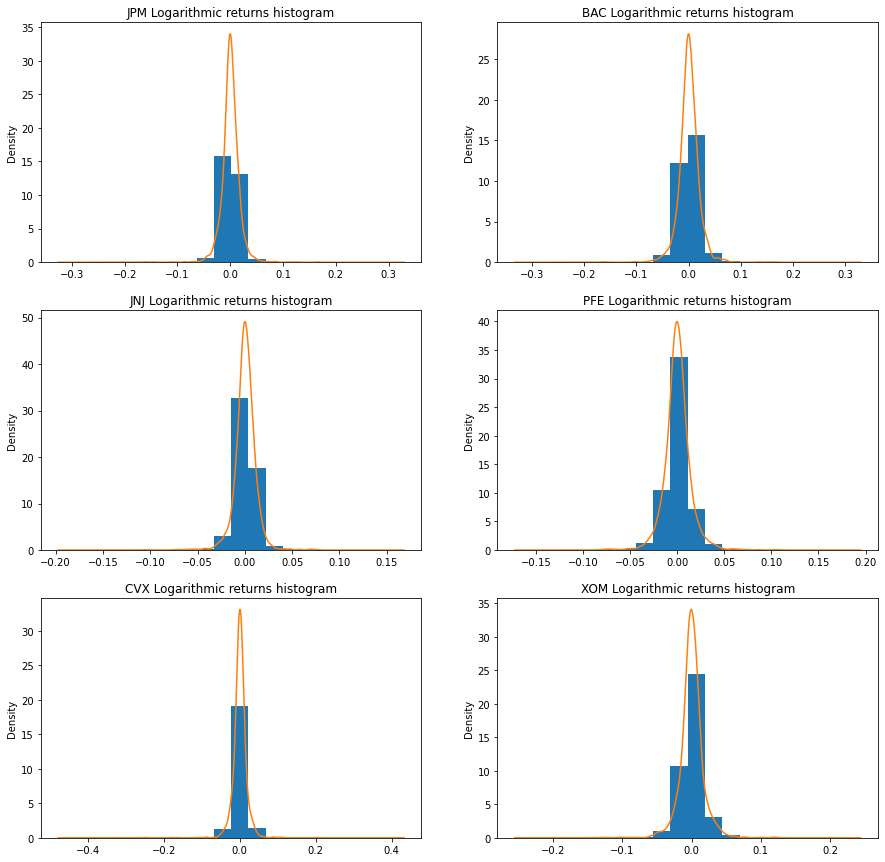

In [32]:
#Rendimenti logaritmici
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.hist(rlJPM, density=True)
plt.title('JPM Logarithmic returns histogram')
rlJPM.plot.density()
plt.subplot(322)
plt.hist(rlBAC, density=True)
plt.title('BAC Logarithmic returns histogram')
rlBAC.plot.density()
plt.subplot(323)
plt.hist(rlJNJ, density=True)
plt.title('JNJ Logarithmic returns histogram')
rlJNJ.plot.density()
plt.subplot(324)
plt.hist(rlPFE, density=True)
plt.title('PFE Logarithmic returns histogram')
rlPFE.plot.density()
plt.subplot(325)
plt.hist(rlCVX, density=True)
plt.title('CVX Logarithmic returns histogram')
rlCVX.plot.density()
plt.subplot(326)
plt.hist(rlXOM, density=True)
plt.title('XOM Logarithmic returns histogram')
rlXOM.plot.density()

In [35]:
import statsmodels.api as sm

Ora plottiamo per ogni azione istogramma kernel density boxplot, qq plot

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


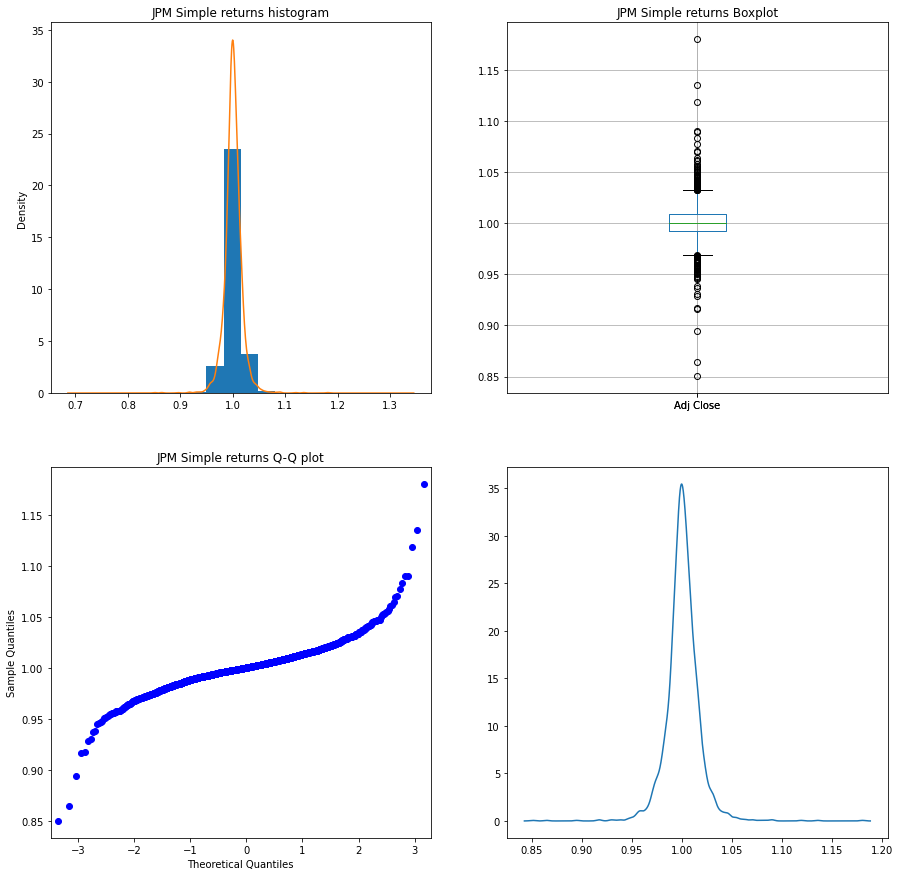

In [59]:
#JPM
fig = plt.figure(figsize=(15, 15))
left = -1.8

ax=fig.add_subplot(221)
plt.hist(rsJPM, density=True)
plt.title('JPM Simple returns histogram')
rsJPM.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rsJPM)
plt.title('JPM Simple returns Boxplot')
rsJPM.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rsJPM, line='s', ax=ax)
plt.title('JPM Simple returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rsJPM)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
# plt.subplot(224)
# plt.kernel_density(rsJPM)
# plt.title('JPM Simple returns Kernel Density')
